 ## $\underline{ \textbf{Data assimilation on a PAPA}}$
 
 
 
 **Statut** :OK
 
**Purpose**: We propose here an assimilation problem whose goal is to infer the mass **m** and moment of inertia **$I_\alpha$** of a PAPA from observations made on displacemenst.
 
 
 **Reference** : 
 
 [1] : [ V. Mons, J.-C. Chassaing, T. Gomez, P. Sagaut, "Reconstruction of unsteady viscous flows using data assimilation schemes", JCP 316 (2016) p. 255-280.](https://dropsu.sorbonne-universite.fr/s/oP8s9CeNS5zW5DG)
 
 [2] : [ A. Chaarane, "Data Assimilation for Flow Induced Vibrations",Stage, InstitutJean Le Rond D’Alembert, 2021.](https://dropsu.sorbonne-universite.fr/s/kr97PiKoJ8jFHfw)
 
 
-----------------------------------
**A. Chaarane**, Institute  D'Alembert, (2 May 2022)

-----------------------------------

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pickle
import os
import sys
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import copy
from tabulate import tabulate

# ------ Importation Local
# utils for Post-Trait ( plot, ..)
sys.path.append("../")
from Post_Trait import POSTRAIT
Path_src     = "../../"
#--- DATA : output of DA code

#--- Config 
PATH_CONF = Path_src+"Inference_Problem/PAPA/" 
sys.path.append(PATH_CONF)

PST_dic = {}

# ---- cas  : EnVar(2)
# Load all results of DA : 
Path_res       = "PAPA/MassIalpha/"
PATH_DATA      = Path_src+"DATA_J05M09H14/DA_4DEnVar_V2/"+Path_res
label1         = "EnVar"
label          = label1
color          = "grey"
PST            = POSTRAIT(PATH_DATA,label=label,color=color)



### Configuration of the DA problem
We propose here an inference problem on the mass $m$ and the moment of inertia $I_α$ of the structure. The observations were made on the airfoil displacements, pitch and plung, every 0.05 step time  in the time interval [ 0, 1]. The reference and initialization control vectors are defined in the table below along with the observation and ensemble parameters.

In [3]:
PST.show_cfg()

-------------------------------------------------------------------------------------------------------------------
                                                Parametres                                         
--------------------------------------------------------------------------------------------------------------------
     Modele name      :                   PAPA                
     DA Method        :                   4DEnVar (V2)        
     Uncertains param :                                                       
                  name     : mass   I_alpha
                 reference : mass = 87.07   I_alpha = 3.73   
                 estimate  : mass = 75.0   I_alpha = 1.8   
                                                                         
     Nbr Iteration =  15  |  Nbr Ensemble =   30  | Param_sigma = 0.300000
                                                                         
     Observations     :                                                  

### Function Cost


$\newcommand{\Gama}{\boldsymbol{\gamma}} 
\newcommand{\B}{\boldsymbol{B}} 
\newcommand{\C}{\boldsymbol{C}} 
\newcommand{\Gamae}{\boldsymbol{\gamma}^{(e)}}
\newcommand{\YN}{( \boldsymbol{y}{_k})_{0\leq k\leq N}}
\newcommand{\XN}{( \boldsymbol{x}{_k})_{0\leq k\leq N}}
\newcommand{\Ep}{ \boldsymbol{E}'}
\newcommand{\Beta}{ \boldsymbol{\beta}}
\newcommand{\h}{ \boldsymbol{h}}
\newcommand{\x}{ \boldsymbol{x}}
\newcommand{\y}{ \boldsymbol{y}}$

The DA framework addressed in this study is to infer the control vector $\Gama$ assuming that observations $\boldsymbol{y}$  are given by
$\boldsymbol{y}=\boldsymbol{h}(\boldsymbol{x}) +\boldsymbol{\epsilon}^0 $, with $\h$  the observation operator and $\boldsymbol{\epsilon}^0$  the measurement error.
If the model is supposed to be exact,  the control vector is sought as a solution which minimises the following cost function

\begin{align}
J(\Gama) &= \; \frac{1}{2} \Vert \h\big(\x (\Gama)\big) - \y \Vert^2_{\C^{-1}} 
%\textbf{Grad}_{obs} &=\sum_{n=0}^{N} \boldsymbol{H}_k '^T \C^{-1}\boldsymbol{d}\\
%\textbf{Hess}_{obs}&=\sum_{n=0}^{N} \boldsymbol{H}_k '^T \C^{-1}\boldsymbol{H}_k '
\end{align}

where $\C$ denotes the covariance matrix of the measurement error and $ \Vert \cdot \Vert ^2_{\C^{-1}} = \cdot ^T \C ^{-1} \cdot$.

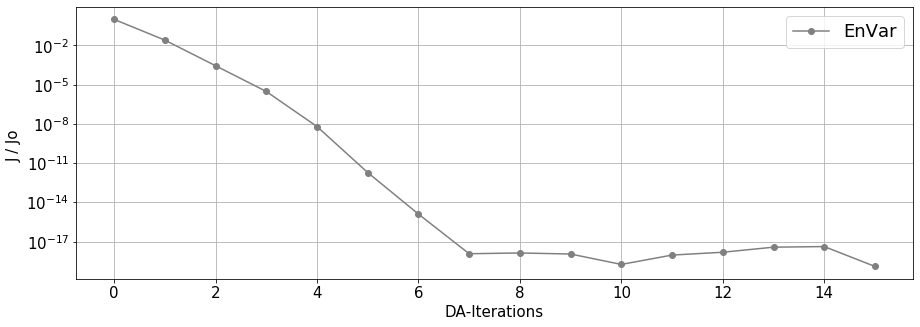

In [4]:
plt.figure(figsize=(15,5))
PST.plot_Jcost()

Here we plot the cost function $J$ as a function of the number of iterations, we plot the logarithm of ($J/J_0$) where $J_0$ is the cost caculated with the initialization vector.  We can see that the latter decreases with each iteration and starts to converge around the 3rd iteration. Here we have deactivated the breaking criterion to see the saturation of the cost function. 

### Control Vectors  

In [5]:
PST.show_param_ref_opti_est(True)

+---------+-------------+------------------+-------------+
|         |   Reference |   Initialisation |   Optimized |
+=========+=============+==================+=============+
| mass    |       87.07 |             75   |       87.07 |
+---------+-------------+------------------+-------------+
| I_alpha |        3.73 |              1.8 |        3.73 |
+---------+-------------+------------------+-------------+


The optimized vector presented here is the control vector obtained with the DA optimization in the last Iteration, we see that it is equal to the reference with a good precision. This shows that our assimilation method is very efficient.

### Reconstruction of airfoil oscillations. 

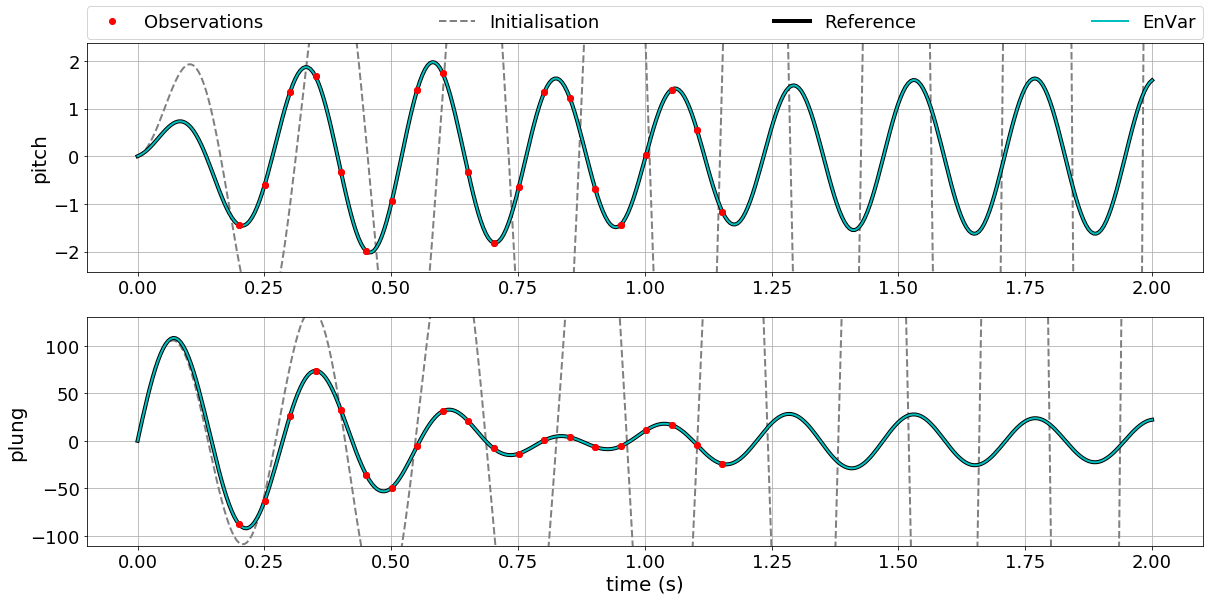

In [6]:
plt.figure(figsize=(20,100))
PST.plot_obs_ref_est_opt()

We have represented the reconstruction of the airfoil displacements as a function of time. We have in red the observations, in grey the initial calculation which is very far from the reference solution which is in cyan color. We can see that after the optimization process we manage to reconstruct perfectly the displacements of the profile by passing over the observations and which are almost equal to the reference state at long times. 

### Sample analysis during the optimisation process. 

In [7]:
df_Param_Ens = PST.get_DataFram()
df_Param_Ens.head(5)

,Unnamed: 0,mass,I_alpha,Sample,DA_Iter,Solver,Folder_DATA,file_observabels
0,0,67.978416,1.786060,0,0.0,PAPA,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,/home/avicene/Documents/These/CODE/DATA_ASSIMI...
1,1,72.205822,1.140939,1,0.0,PAPA,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,/home/avicene/Documents/These/CODE/DATA_ASSIMI...
2,2,81.353758,1.585471,2,0.0,PAPA,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,/home/avicene/Documents/These/CODE/DATA_ASSIMI...
3,3,71.487889,2.281620,3,0.0,PAPA,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,/home/avicene/Documents/These/CODE/DATA_ASSIMI...
4,4,69.229683,1.202634,4,0.0,PAPA,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,/home/avicene/Documents/These/CODE/DATA_ASSIMI...


We display above a part of the samples, we have a total of $N_{ens} \times N_{iter}$ =$40\times 4$  samples. For a better analysis, we can visualize them on the figure above.  

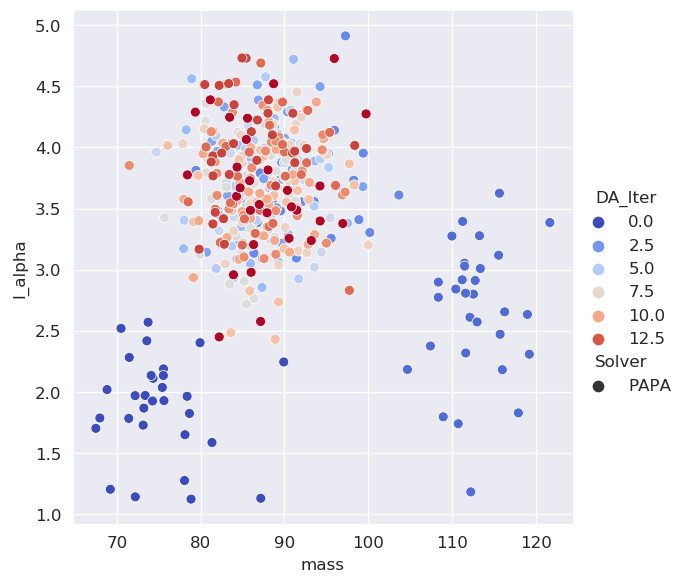

In [8]:
with sns.axes_style("darkgrid"):
    ax=sns.relplot(data=df_Param_Ens, x=PST.CFG.Param_Name[0], y=PST.CFG.Param_Name[1],hue ="DA_Iter",palette="coolwarm", style="Solver" )
    ax.fig.set_dpi(120)


Here we represent the samples obtained at each iteration, we can see that from one iteration to the next the samples group together to form a kind of cluster.

### Strategy for combining DA and FNN

In [25]:
def Compute_Bary(Param) :
    bary = np.zeros(Param.shape[1])
    for prm in Param :
        bary += prm
    bary = (1/len(Param))*bary
    return bary

def Calc_Cg(df, i_main_loop):
    df_1 = df.loc[(df["DA_Iter"] == i_main_loop-1)]
    Cg1 = Compute_Bary(df_1[PST.CFG.Param_Name].values)
    ## Add Cg in DataFram :
    return Cg1

def Calc_Param_bar(df_Param, Param_Name):
    df_Param_bar =copy.copy(df_Param)
    for i,parm_nm in enumerate(Param_Name): 
        df_Param_bar[parm_nm] =( 2*df_Param[parm_nm] - PST.CFG.Param_Bounds[i][0] -PST.CFG.Param_Bounds[i][1])\
                        / (PST.CFG.Param_Bounds[i][1]-PST.CFG.Param_Bounds[i][0])
    return df_Param_bar


In [26]:
DL_Pred_max  = int(0.1*PST.CFG.DA_N_ens)
DL_Train_max = int(2*PST.CFG.DA_N_ens)
DL_Rc        = 10*PST.CFG.DA_Param_Sigma
Use_old_data = False

/tmp/ipykernel_2158218/179986818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Param["Training"]    = False
/tmp/ipykernel_2158218/179986818.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Param["Prediction"]  = False


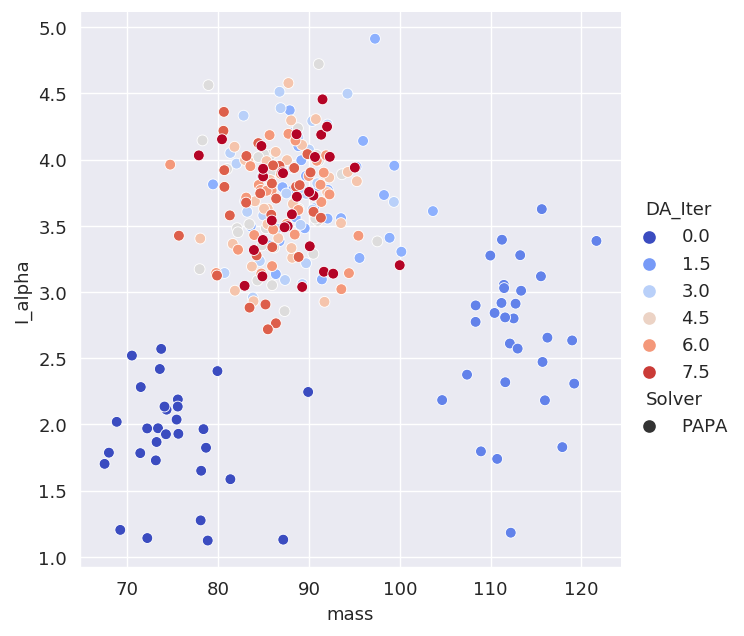

In [27]:
i_main_loop             = 8
df_Param                = df_Param_Ens.loc[ (df_Param_Ens["DA_Iter"] <=i_main_loop) ]
df_Param["Training"]    = False
df_Param["Prediction"]  = False
df_Param_bar         = Calc_Param_bar(df_Param, PST.CFG.Param_Name)
df_Param
with sns.axes_style("darkgrid"):
    ax=sns.relplot(data=df_Param, x=PST.CFG.Param_Name[0], y=PST.CFG.Param_Name[1],hue ="DA_Iter",palette="coolwarm", style="Solver" )
    ax.fig.set_dpi(130)

In [28]:
Cg = Calc_Cg(df_Param, i_main_loop)

df_Param = Get_Train_Pred_Ensemble(df_Param, PST.CFG.Param_Name, Use_old_data, DL_Pred_max, DL_Train_max, DL_Rc, i_main_loop)

/home/avicene/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [30]:
df_Param

,Unnamed: 0,mass,I_alpha,Sample,DA_Iter,Solver,Folder_DATA,file_observabels,Training,Prediction
0,0,67.978416,1.786060,0,0.0,PAPA,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,False,False
1,1,72.205822,1.140939,1,0.0,PAPA,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,False,False
2,2,81.353758,1.585471,2,0.0,PAPA,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,False,False
3,3,71.487889,2.281620,3,0.0,PAPA,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,False,False
4,4,69.229683,1.202634,4,0.0,PAPA,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,False,False
...,...,...,...,...,...,...,...,...,...,...
265,265,84.931648,3.392663,25,8.0,PAPA,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,False,True
266,266,80.428071,4.153337,26,8.0,PAPA,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,False,False
267,267,84.769093,4.102649,27,8.0,PAPA,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,False,False
268,268,88.639309,4.191411,28,8.0,PAPA,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,False,False


,Unnamed: 0,mass,I_alpha,Sample,DA_Iter,Solver,Folder_DATA,file_observabels,Training,Prediction
246,246,84.959404,3.872555,6,8.0,PAPA,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,False,True
252,252,84.953932,3.930430,12,8.0,PAPA,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,False,True
265,265,84.931648,3.392663,25,8.0,PAPA,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,False,True


### Automatic  Selection 



###  Example of cluster detection for $I_{DA}$ equals 2

In [ ]:
i_cluster = 2
df_samples2 =  df_samples.loc[ (df_samples["DA_Iter"] ==i_cluster) |  (df_samples["DA_Iter"] ==i_cluster+1)]
df_samples2_bar  = copy.copy(df_samples2)



index_0 = df_samples2_bar.index.tolist()[0]

rayon_culster    = 0.03
N_cluster_sample = 1


Param_old_bar    = df_samples2_bar.loc[(df_samples["DA_Iter"] ==i_cluster)][PST.CFG.Param_Name].values
Param_new_bar    = df_samples2_bar.loc[(df_samples["DA_Iter"] ==i_cluster+1)][PST.CFG.Param_Name].values


            
HF_param_bar, FNN_param_bar =Get_FNN_Samples(Param_old_bar, Param_new_bar, N_cluster_sample, rayon_culster)   


In [ ]:
for prm in FNN_param_bar :
    index = df_samples2_bar.loc[ (df_samples2_bar[PST.CFG.Param_Name[0]] ==prm[0]) &  \
                         (df_samples2_bar[PST.CFG.Param_Name[1]] ==prm[1])    ].index 
    df_samples2.iloc[index[0]-index_0,-1]  = "FNN"

In [ ]:
with sns.axes_style("darkgrid"):
    ax=sns.relplot(data=df_samples2, x=PST.CFG.Param_Name[0], y=PST.CFG.Param_Name[1],hue ="DA_Iter",palette="coolwarm", style="Solver" )
    ax.fig.set_dpi(120)

We plot here in blue the samples of the previous iteration, and in red the samples of the current iteration. The round dots (blue and red) represent the samples that will be propagated with the HF (High Fidelity) solver. The results obtained from the propagation of the round points will be used to train the DL (Deep Learning) solver to predict the results of the cross points (red).

### Example of propagation of the DL solver

In [ ]:
call_normalise  = 0
PST.scaler = StandardScaler()
def MyFOM(param) :
    global call_normalise
    # param = [m,I]
    
    # on recupere le numero du sample et de l'iteration
    # on parcours tout les samples et on s'arrete si mass = param[0] and mass = param[]
    n_iter_samp =df_samples.loc[(df_samples[PST.CFG.Param_Name[0]] == param[0]) & \
                        (df_samples[PST.CFG.Param_Name[1]] == param[1])][["DA_Iter", "Sample"]].values[0]
    
    n_iter = n_iter_samp[0]; n_sample = n_iter_samp[1]
    obsvervables = PST.get_observables_of_sample(n_iter,n_sample) 
    
    if np.isnan(obsvervables).any() :
        print("Warning !!!!!")
        print("NaN found in ")
        print(f"n_iter = {n_iter} and n_sample = {n_sample}")   
    return  obsvervables  



In [ ]:
## import tensorflow
# deactivate CUDA
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Flatten,Dense

prfx = "FNN/"+PATH
folder = "../../DATA/"

In [ ]:
n_time           = len(PST.time)
n_features       = PST.CFG.Param_Dim
input_shape      = (n_time,n_features+1)

In [ ]:
def MyFNN(input_shape,n_out, N_layer=2, N_units = 30, learning_rate=1e-4):
    model              =  Sequential()
    initializer        =  tf.keras.initializers.GlorotUniform(seed=101)
    optimizer          =  tf.keras.optimizers.Adam(learning_rate=learning_rate) 
    bias_initializer   =  tf.keras.initializers.Zeros()
    kernel_regularizer =  tf.keras.regularizers.l2(l2=0)
    model.add(Dense(N_units, kernel_regularizer=kernel_regularizer,activation='tanh',bias_initializer=bias_initializer,kernel_initializer=initializer,input_shape=input_shape))
    
    for layer in range(N_layer-1) :
        model.add(Dense(N_units, kernel_regularizer=kernel_regularizer,activation='tanh',bias_initializer=bias_initializer,kernel_initializer=initializer))
    
    model.add(Flatten())
    model.add(Dense(n_out))
    
    model.compile(optimizer=optimizer, loss='mse')
    
    return model

model = MyFNN(input_shape,2*n_time)
#model.summary()


## Training 

In [ ]:
df_samples_train = df_samples2.loc[ (df_samples2["Solver"] =="PAPA")]
df_samples_test  = df_samples2.loc[ (df_samples2["Solver"] =="FNN")]


In [ ]:
model       = MyFNN(input_shape,2*n_time,N_layer=5, N_units = 40, learning_rate=1e-3)
Param_train = df_samples_train[PST.CFG.Param_Name].values
Param_test  = df_samples_test[PST.CFG.Param_Name].values
PTD         = PTD_param(model, PST.time,MyFOM, Param_train, Param_test, Param_vald=np.array([]),
                                 folder = folder, prfx=prfx)

PTD.Get_Dataset()


In [ ]:
PTD.Myfit(epochs = 300, batch_size=512, verbose = 0, validation=False, overwrite=False)


In [ ]:
PTD.plot_loss(key=['loss'],figsize=(10,4))

#### Prediction    


In [ ]:
y=PTD.Mypredict(overwrite=True)

In [ ]:
PTD.plot_truth_predi(figsize=(20,8),name_mu = "[m, I]", ylabel = "Pitch", ylabel2= "Plung")


In [ ]:
#PTD.name="FNN"
#PTD.all_info()
#print("")

As we can see, the predictions are very satisfactory but not perfect.  This will have an impact on the convergence of the data assimilation optimization process. To analyze this impact, we will perform a full data assimilation calculation coupled with a DL solver.

In [ ]:
Path_FNN = "../../Src_Solver/FNN/"
sys.path.append(Path_FNN)
from  Pre_processing_data import PTD_param